In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edwardli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
sid = SentimentIntensityAnalyzer()

In [4]:
sid.polarity_scores(open('responses.txt').read())

{'neg': 0.058, 'neu': 0.825, 'pos': 0.117, 'compound': 1.0}

In [6]:
sid.polarity_scores(open('research_segs/research_00.txt').read())

{'neg': 0.033, 'neu': 0.904, 'pos': 0.063, 'compound': 1.0}

In [7]:
sid.polarity_scores(open('research_segs/research_01.txt').read())

{'neg': 0.05, 'neu': 0.841, 'pos': 0.109, 'compound': 1.0}

In [8]:
sid.polarity_scores(open('research_segs/research_02.txt').read())

{'neg': 0.051, 'neu': 0.865, 'pos': 0.084, 'compound': 1.0}

In [9]:
sid.polarity_scores(open('research_segs/research_03.txt').read())

{'neg': 0.049, 'neu': 0.836, 'pos': 0.115, 'compound': 1.0}

In [10]:
sid.polarity_scores(open('research_segs/research_03_2.txt').read())

{'neg': 0.05, 'neu': 0.846, 'pos': 0.105, 'compound': 1.0}

In [11]:
sid.polarity_scores(open('research_segs/research_04.txt').read())

{'neg': 0.088, 'neu': 0.813, 'pos': 0.099, 'compound': 0.9999}

In [1]:
from textblob import TextBlob

In [4]:
TextBlob(open('responses.txt').read()).sentiment

Sentiment(polarity=0.10367369150724237, subjectivity=0.4532373581654155)

In [5]:
TextBlob(open('research.txt').read()).sentiment

Sentiment(polarity=0.08156552960894634, subjectivity=0.42189350094218003)

In [19]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/edwardli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/edwardli/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
def count_adj_adv(tb):
    adj_tag_list = ['JJ','JJR','JJS']
    adv_tag_list = ['RB','RBR','RBS']
    
    adj_cnt = 0
    adv_cnt = 0
    
    for word, pos in tb.tags:
        if pos in adj_tag_list:
            adj_cnt += 1
        elif pos in adv_tag_list:
            adv_cnt += 1
    
    return adj_cnt, adv_cnt

In [3]:
responses = TextBlob(open('responses.txt').read())

In [4]:
res_adj = count_adj_adv(responses)

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

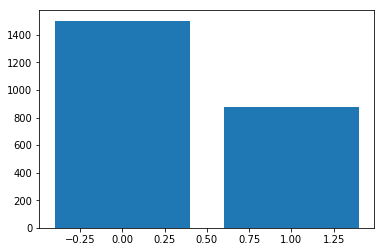

In [9]:
plt.bar((0, 1), res_adj)

In [5]:
research = TextBlob(open('research.txt').read())

In [6]:
resa_adj = count_adj_adv(research)

<BarContainer object of 2 artists>

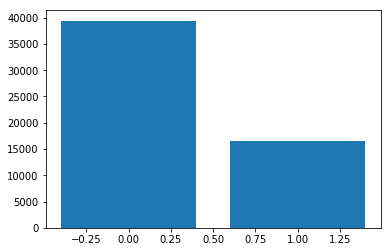

In [10]:
plt.bar((0, 1), resa_adj)

In [11]:
sum(res_adj) / len(responses.words)

0.1329531477132953

In [12]:
sum(resa_adj) / len(research.words)

0.14446345132218205

In [6]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

I1115 14:41:27.048469 4717723072 file_utils.py:39] PyTorch version 1.3.1 available.
I1115 14:41:27.138525 4717723072 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


2019-11-15 14:41:28,805 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/classy-imdb-en-rnn-cuda%3A0/imdb-v0.4.pt not found in cache, downloading to /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71


100%|██████████| 1501979561/1501979561 [08:50<00:00, 2830515.15B/s]

2019-11-15 14:50:19,983 copying /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71 to cache at /Users/edwardli/.flair/models/imdb-v0.4.pt


2019-11-15 14:50:22,069 removing temp file /var/folders/76/3ttbq1hj5rjcsx4y_bmznj400000gn/T/tmpmh0k9z71
2019-11-15 14:50:22,333 loading file /Users/edwardli/.flair/models/imdb-v0.4.pt


In [7]:
s = flair.data.Sentence(open('responses.txt').read())

In [ ]:
flair_sentiment.predict(s)

In [9]:
response_sent = s.labels

In [10]:
response_sent

[NEGATIVE (0.9818025231361389)]

In [11]:
s2 = flair.data.Sentence(open('research.txt').read());

In [12]:
flair_sentiment.predict(s2);

KeyboardInterrupt: 

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [14]:
res = TextBlob(open('responses.txt').read())

In [20]:
t = nlp(str(res.sentences[0]))

In [27]:
t

Dear Dad,
I'm so sorry to hear that Mr. and Mrs. Friedson's son, Brian, has been diagnosed with Duchenne Muscular Dystrophy.

In [28]:
[(i,i.dep_) for i in t]

[(Dear, 'amod'),
 (Dad, 'npadvmod'),
 (,, 'punct'),
 (, ''),
 (I, 'nsubj'),
 ('m, 'ROOT'),
 (so, 'advmod'),
 (sorry, 'acomp'),
 (to, 'aux'),
 (hear, 'xcomp'),
 (that, 'mark'),
 (Mr., 'poss'),
 (and, 'cc'),
 (Mrs., 'compound'),
 (Friedson, 'conj'),
 ('s, 'case'),
 (son, 'nsubjpass'),
 (,, 'punct'),
 (Brian, 'appos'),
 (,, 'punct'),
 (has, 'aux'),
 (been, 'auxpass'),
 (diagnosed, 'ccomp'),
 (with, 'prep'),
 (Duchenne, 'compound'),
 (Muscular, 'compound'),
 (Dystrophy, 'pobj'),
 (., 'punct')]

In [32]:
from tqdm import tqdm

In [44]:
act_cnt = 0
pass_cnt = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(res.sentences):
    t = nlp(str(sentence))
    for tok in t:
        if tok.dep_ in PASSIVE:
            pass_cnt += 1
        elif tok.dep_ in ACTIVE:
            act_cnt += 1

100%|██████████| 777/777 [00:06<00:00, 115.43it/s]


In [45]:
(act_cnt, pass_cnt)

(2500, 311)

In [62]:
act_perc = act_cnt / (act_cnt + pass_cnt)

In [34]:
research = TextBlob(open('research.txt').read())

In [47]:
act_cnt_2 = 0
pass_cnt_2 = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(research.sentences):
    t = nlp(str(sentence))
    for tok in t:
        if tok.dep_ in PASSIVE:
            pass_cnt_2 += 1
        elif tok.dep_ in ACTIVE:
            act_cnt_2 += 1

100%|██████████| 16284/16284 [02:20<00:00, 115.57it/s]


In [48]:
(act_cnt_2 , pass_cnt_2)

(37233, 13477)

In [61]:
act_perc_2 = act_cnt_2 / (act_cnt_2 + pass_cnt_2)

In [51]:
act_sent = 0
pass_sent = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(res.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if p > a:
        pass_sent += 1
    elif a > p:
        act_sent += 1

100%|██████████| 777/777 [00:06<00:00, 117.30it/s]


In [52]:
(act_sent, pass_sent)

(686, 51)

In [57]:
act_sent_perc = act_sent / (act_sent + pass_sent)

In [54]:
act_sent_2 = 0
pass_sent_2 = 0

PASSIVE = ['nsubjpass', 'auxpass', 'csubjpass']
ACTIVE = ['nsubj', 'aux', 'csubj']

for sentence in tqdm(research.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if p > a:
        pass_sent_2 += 1
    elif a > p:
        act_sent_2 += 1

100%|██████████| 16284/16284 [02:23<00:00, 113.45it/s]


In [55]:
(act_sent_2, pass_sent_2)

(11396, 3157)

In [58]:
act_sent_perc_2 = act_sent_2 / (act_sent_2 + pass_sent_2)

In [59]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

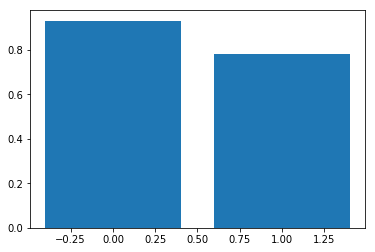

In [60]:
plt.bar((0,1), (act_sent_perc, act_sent_perc_2))

<BarContainer object of 2 artists>

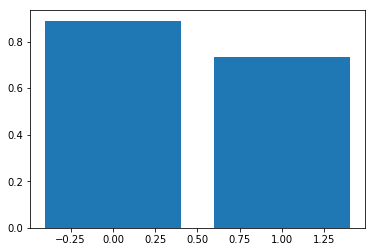

In [63]:
plt.bar((0,1), (act_perc, act_perc_2))

In [64]:
spacy.__version__

'2.1.8'

In [65]:
act_sent_perc, act_sent_perc_2

(0.9308005427408412, 0.783068783068783)

In [68]:
for sentence in tqdm(res.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if a > p:
        print(sentence)

  2%|▏         | 18/777 [00:00<00:09, 84.11it/s]

Dear Dad,
I'm so sorry to hear that Mr. and Mrs. Friedson's son, Brian, has been diagnosed with Duchenne Muscular Dystrophy.
Muscular Dystrophy is an inherited disease that causes a person's muscle fibers to be highly susceptible to damage, and over time, these muscles become weaker.
Duchenne Muscular Dystrophy, in particular, is the most severe of the nine types of muscular dystrophies, and it affects voluntary muscles (muscles used to purposefully move body parts), the heart, and breathing muscles.
He fell frequently and had difficulty getting up, running, and jumping.
Mr. And Mrs. Friedson said that he had a waddling-like gait and wondered if he suffered from mild mental retardation.
Prior to that, the doctors may have developed a suspicion of muscular dystrophy using blood tests, ultrasound, and electromyography.
The majority of Duchenne Muscular Dystrophy patients are male because DMD is a recessive trait carried on the X chromosome.
Chromosomes are the small units of genetic mate

  5%|▌         | 39/777 [00:00<00:07, 92.32it/s]

More specifically, dystrophin helps to anchor the internal cellular cytoskeleton (which is like a skeleton for the cell) to the surface membrane of the cell.
Without dystrophin, the cell membrane, which is usually only permeable to water and specific other substances, allows other things to pass through as well.
When this foreign matter enters the cell, the cell increases in internal pressure and explodes, which destroys the muscle cell-by-cell, essentially piece-by-piece.
DMD will probably kill Brian in his late teens or early 20s from problems with his heart or lungs.
Although there is no cure, current medications (including prednisone) and therapies can slow the progression of the disease.
In addition, current research on mice is promising and may lead to the development of more effective therapies in the future.
Best wishes,

Although spatial patterning is well studied, but we know little about the mechanism underlying the sequential generation of different cell types.
Utilizing va

  8%|▊         | 61/777 [00:00<00:07, 98.39it/s]

They also observed a reduction in the number of motoneuron projections in hb-and an increase in the number of motoneurons in neuroblast that continuously expressing Hb.
Furthermore, they also examined the effect of Hb on first-born glial cell fates.
The hb-mutants lacked first-born MM-CB glia at the midline, but have no change in the number of later-born channel glia at the midline.
In contrast, misexpression of Hb in all neuroblasts resulted in extra MM-CB glia at the midline and a decrease in the number of midline channel glia.
The results above suggested that Hb's regulation on first-born cell fate was independent of cell type identity.
In addition, the authors showed that Kr was necessary and sufficient for second-born cell fates.
In neuroblast 7-3 lineage, Kr-had variably effects on first-born 1/1G sibling neurons and second-born interneuron 2 was almost always missing while the third-born interneuron 3 was almost always normal.
In contrast, continuously expressing Kr resulted in 

 11%|█         | 83/777 [00:00<00:06, 101.35it/s]

Besides, the temporal gene expression pattern in neuroblasts is very similar to the spatial gene expression pattern at cellular blastoderm.
Gorodnichenko, Martinez-Vazquez, and Peter use household level data from the Russian Longitudinal Monitoring Survey to estimate the effects of Russia's 2001 tax reform on a measure of tax evasion.
The paper also provides estimates of the productivity response to the flat tax reform and of the deadweight loss from personal income tax that incorporate estimates of tax evasion and consumption changes.
Difference-in-difference and regression-discontinuity inspired approaches allow the authors to distinguish between changes in voluntary compliance and in tax enforcement policies as reasons for the decrease in tax evasion.
The estimates of deadweight loss imply that there is a smaller gain in efficiency from the tax reform than implied by approaches that do not account for changes in tax evasion and consumption.
The measure used as a proxy for tax evasio

 14%|█▎        | 105/777 [00:01<00:06, 104.81it/s]

Surveys that target firms like the World Bank's Business Environment and Enterprise Performance Survey (hereafter, BEEPS) could also be useful in regard.
The BEEPS contains information about illicit payments made to public officials as well as information about payments received and labor practices.
Using additional survey data to get a feel for the relative magnitude of illicit payments and types of income in the private sector and would seem to be a useful extension of the analysis.
I also took an initial look at other countries that have had flat tax reforms as well as readily available household level surveys of income and expenditures.
Latvia might be a possible country to use to extend this paper's techniques.
There have also been additional rate adjustments.
Most of the other countries that have pursued flat tax reform do not seem to have household level expenditure data available for the years surrounding reform.
In some cases; Kyrgyzstan, Ukraine, and Mongolia for example, tax

 16%|█▋        | 128/777 [00:01<00:06, 107.04it/s]

Or, why do you think that?
I also think that posing questions hat could relate more to students' lives, like the questions listed in my response to the first question, could also have the potential to prompt more student explanation.
At the beginning of the lesson, do students have the opportunity to record their ideas and predictions and share them with others in the class?
Students have the opportunity to record their predictions in their notebooks.
It is not clear whether students share these predictions with their classmates; therefore I would include a specific statement in the lesson that says: Have some students share their predictions in the discussions.
Students also have the opportunity to share their ideas about friction with classmates, but they do not have the opportunity to record their initial ideas.
To address this weakness I would first have students write a few sentences about their ideas when they hear the word friction.
Then I would have students share the sentences

In this section they investigate shoe traction and friction.


KeyboardInterrupt: 

In [70]:
for sentence in tqdm(research.sentences):
    t = nlp(str(sentence))
    a = 0
    p = 0
    for tok in t:
        if tok.dep_ in PASSIVE:
            p += 1
        elif tok.dep_ in ACTIVE:
            a += 1
    if p > a:
        print(sentence)

  0%|          | 19/16284 [00:00<03:08, 86.25it/s]

As result much is known about the fruit flies genome; however, on occasion new mutations are discovered and experimentation is undertaken to determine the exact genes involved in these new mutants.
To answer questions, such as: what are modes of inheritance (dominant/recessive/sex-linked/autosomal); how many genes are involved; and, where are the genes located -- cross breeding experimentation was undertaken.
Specifically, five initial crosses and five secondary crosses were preformed in hopes of answering these questions.
Answering these questions was accomplished by scoring flies of both F1 and F2 generations of the two crosses.
Finally, the Crosses II and III were done to determine where the genes were located in regards to the second and third autosome, with autosomal specific traits.
Specifics of these marker types and their phenotypic expression can be found in the MATERIALS AND METHODS.


  0%|          | 41/16284 [00:00<02:50, 95.37it/s]

The crosses and scoring were done over a series of seven weeks and all flies for all crosses were grown at 24° C. All flies were anesthetized using CO2 and inspected under a dissecting or stereoscopic microscope while on CO2 pads.
The average time sedated was minimized to prevent sterility.
Flies were handled with small brushes and prodding needles; for specifics on fly handling please see Jeyabalan (2005).
Two Ore-R stocks and eight mutant stocks were initially provided.
Two new cultures of U-5343 were made during the experiment to maintain the stock for later backcrosses.
Wild-type flies were phenotypically described as: tan bodied, red eyed, full wing venation with straight wings, and normal straight bristles.
For more details about mark stocks and traits see Jeyabalan (2005)
Concerning the crosses in general, when virgin females were needed all flies were removed from source bottle and, then, 6-8 hours later virgin females were harvested.
For all crosses parent flies were removed f

  0%|          | 66/16284 [00:00<02:34, 105.14it/s]

From the F1 generation, flies were collected and placed into a new bottle for the F1xF1 of Cross B. F2 flies were scored.
Marker Cross I: unknown virgin females were crossed with M-I males, F1 flies were scored.
From the F1 generation, flies were collected and placed into a new bottle for the F1xF1 of Cross I. F2 flies were scored.
Marker Cross II: unknown virgin females were crossed with M-II type males, F1 flies were scored.
From the F1 generation, Bl L/Cy+ male flies were collected and crossed with unknown virgin females -- a male backcross.
Cross was not done in duplicate.
Additionally, Bl+ L+/Cy male flies were collected and crossed with unknown virgin females -- not done in duplicate.
The first cross yielded offspring which were scored.
The second cross yielded no offspring, so no flies were scored.
Marker Cross III: unknown virgin females were crossed with M-III type males, F1 flies were scored.
From the F1 generation, Gl Sb/LVM+ male flies were collected and crossed with unknow

  1%|          | 89/16284 [00:00<02:34, 104.84it/s]

M-II backcross progeny were observed phenotypically as bristle, lobed, and black bodied -- showing that the body color is not on the second autosome, but on the third.
The mutation tv is was given at 3.8 mu.
The map, with all marker genes included, is represented by image 1:
Through well thought-out cross breeding experiments, the previously unknown genetic components of a true breeding Drosophila m. culture (U-5342) was determined.
In all, four new genes were discovered and described, in brief, that control body color, wing venation, and eye color.
And are mapped at the locations in the figure above.


  1%|          | 155/16284 [00:01<02:33, 105.41it/s]

Of all these hydrocarbon groups, polycylic aromatic hydrocarbons (PAHs) are thought have the most toxic effects, as they attach easily to sediment surfaces and are relatively resistant to degradation (Vo, et al., 2004).
In fact, aquatic insects are often used as an indicator of water quality, a concept known as biomonitoring.
In an experiment investigating the effects of urban runoff on stream water quality, benthic organisms were surveyed upstream and downstream of an urban development.
The prevalence of dragonflies was found to be significantly higher at upstream sites (22%) than at downstream sites (4%).
It was concluded that this was a result of pollution and eutrophication decreasing the levels of dissolved oxygen in the stream sites downstream of the development (DeBarruel and West, 2003).


  1%|          | 192/16284 [00:01<02:22, 113.25it/s]

The first container was a control with no oil added, and the four successive containers were contaminated with increasing concentrations of unused motor oil (.1%, .5%, 1% and 2%).
I performed two replicates of the experiment; two damselflies were placed with each dragonfly in the first replicate and six damselflies in the second.


  1%|▏         | 216/16284 [00:02<02:26, 109.79it/s]

Though prediction 1 was not supported, prediction 2, regarding the relationship between oil concentration and predation rate, was supported.
There is a compelling possibility that the number of prey eaten was more strongly correlated to predator size than to concentration of oil.
Future versions of this experiment could be improved by using larger sample sizes and taking more measurements over a longer time period.


  2%|▏         | 252/16284 [00:02<02:23, 111.74it/s]

As a quantitative measure of journal quality I used the journal impact factor which is defined by ISI as, "a measure of the frequency with which the 'average article' in a journal has been cited in a particular year or period" (Thomson Scientific website).
The rating is calculated by dividing the number of times articles from the previous two years in the journal were cited in the current year by the total number of articles published in the previous two years.
Articles were selected based on time of publication (2000-2005 only) and subject matter (invasive plant species).
A two signifies that some background theory and research questions were addressed, but no specific hypotheses were provided.
Articles are numbered according to the order that they are presented in the literature cited section at the end.
For the articles given a rating of 3, hypotheses were explicitly stated, generally in the form "we hypothesized that..." or the typical "if...then" format.
All of these articles addr

KeyboardInterrupt: 